<a href="https://colab.research.google.com/github/CakeNuthep/Super_AI/blob/master/Homework/Week4/Class99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import datetime as dt
from sklearn.utils import resample, shuffle

In [2]:
df_map = pd.read_csv('https://raw.githubusercontent.com/CakeNuthep/Super_AI/master/Homework/Week4/thai-mnist-classification/mnist.train.map.csv')

In [3]:
df_compete = pd.read_csv('https://raw.githubusercontent.com/CakeNuthep/Super_AI/master/Homework/Week4/thai-mnist-classification/train.rules.csv')

In [4]:
df_compete

,id,feature1,feature2,feature3,predict
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
...,...,...,...,...,...
5550,769b31a2-cb7e-4a89-89d6-efed3199872e,0c754c5d-4166-433e-ac4d-4d1c7ef8e30a.png,bee226cb-6fbf-4470-b2de-d98e5af6110a.png,8801b5ff-821c-477e-9ce7-f65199f75646.png,0
5551,9f603c3a-4475-4d4b-a3ee-e8f868979749,787e9fe5-cb37-4cc5-afbb-20351616ff71.png,90ef2abe-439b-4655-a932-5a8ca5a91b71.png,c39f05cf-17aa-4b7d-afd3-29667f039216.png,51
5552,f25bbfff-6fd9-41f5-b2c2-0059b1a76bc6,a8c56afb-35cf-473a-bcd9-0927f8b6994b.png,7d15bcf1-5141-480c-9265-70a74aa2ed27.png,8f9eba51-8123-4186-8b11-8d2d2d9d134a.png,55
5553,e550dbb5-5127-4828-ac5b-153e9229992e,70ffaa6c-25a1-435a-8413-a8ad26fc8d7d.png,9b2af0fb-f1be-4782-a614-23fa59a366d7.png,ca58239a-7a35-4c96-9b6a-451e112dc5da.png,67


In [5]:
df_map_unique = df_map.drop_duplicates()


In [6]:
df_map_unique

,id,category
0,75606737-d17d-43eb-86e6-6735b6f45a52.png,8
1,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
2,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0
3,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,b8fd3385-9403-48a4-9d9e-74bde635e688.png,9
...,...,...
8250,9b2af0fb-f1be-4782-a614-23fa59a366d7.png,8
8251,ca58239a-7a35-4c96-9b6a-451e112dc5da.png,6
8252,4ec2ba63-0845-4812-a3fa-1f5eda80de8e.png,8
8253,8479e8d8-d592-4931-926c-17a84b02ad0a.png,2


In [7]:
len(df_map['id'].unique())

8255

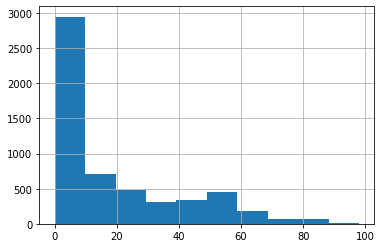

In [8]:
df_compete['predict'].hist()
plt.show()

In [9]:
df_compete.groupby(['predict']).agg(['count'])

,id,feature1,feature2,feature3
,count,count,count,count
predict,,,,
0,645,641,645,645
1,345,334,345,345
2,291,283,291,291
3,319,314,319,319
4,252,239,252,252
...,...,...,...,...
88,8,8,8,8
90,1,1,1,1


# Over Sample

In [10]:
max_size = df_compete['predict'].value_counts().max()

In [11]:
lst = [df_compete]
for class_index, group in df_compete.groupby('predict'):
    lst.append(group.sample(max_size-len(group), replace=True))
df_upsampled = pd.concat(lst)

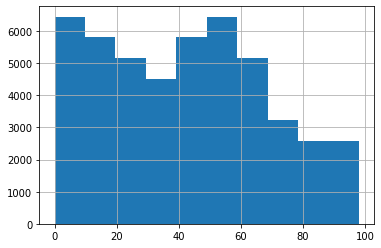

In [12]:
df_upsampled['predict'].hist()
plt.show()

In [13]:
df_upsampled.groupby(['predict']).agg(['count'])

,id,feature1,feature2,feature3
,count,count,count,count
predict,,,,
0,645,641,645,645
1,645,621,645,645
2,645,626,645,645
3,645,635,645,645
4,645,610,645,645
...,...,...,...,...
88,645,645,645,645
90,645,645,645,645


In [14]:
df_upsampled

,id,feature1,feature2,feature3,predict
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
...,...,...,...,...,...
4736,a561496a-90af-41ba-a064-299d57cb763a,45f1d10e-55c9-4a30-bc6b-ee9a58e2ad7d.png,aebed50b-afe5-48d6-bfc5-10610bb365e5.png,58aa30b0-9381-4754-bbbd-2c848918fb52.png,98
5501,4e765abd-8289-4b3c-aa0a-1f2b5eb209d4,a7b1404e-a688-4909-96e8-784580048e33.png,dd81b5a9-5b8a-4f6f-a7cb-458915dbcf54.png,3d3b2295-e846-44a4-acc4-668733395171.png,98
4736,a561496a-90af-41ba-a064-299d57cb763a,45f1d10e-55c9-4a30-bc6b-ee9a58e2ad7d.png,aebed50b-afe5-48d6-bfc5-10610bb365e5.png,58aa30b0-9381-4754-bbbd-2c848918fb52.png,98
4736,a561496a-90af-41ba-a064-299d57cb763a,45f1d10e-55c9-4a30-bc6b-ee9a58e2ad7d.png,aebed50b-afe5-48d6-bfc5-10610bb365e5.png,58aa30b0-9381-4754-bbbd-2c848918fb52.png,98


In [15]:
df_upsampled = df_upsampled.rename(columns={"id": "ID"})

In [16]:
df_upsampled.isna().sum()

ID             0
feature1    1439
feature2       0
feature3       0
predict        0
dtype: int64

In [17]:
merg_data = pd.merge(df_upsampled, df_map_unique, left_on='feature1',right_on='id',how='left')
merg_data = pd.merge(merg_data, df_map_unique, left_on='feature2',right_on='id',how='left')
merg_data = pd.merge(merg_data, df_map_unique, left_on='feature3',right_on='id',how='left')

In [18]:
merg_data

,ID,feature1,feature2,feature3,predict,id_x,category_x,id_y,category_y,id,category
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,NaN,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,8,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,NaN,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,8,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,NaN,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,8,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,NaN,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,NaN,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
...,...,...,...,...,...,...,...,...,...,...,...
47725,a561496a-90af-41ba-a064-299d57cb763a,45f1d10e-55c9-4a30-bc6b-ee9a58e2ad7d.png,aebed50b-afe5-48d6-bfc5-10610bb365e5.png,58aa30b0-9381-4754-bbbd-2c848918fb52.png,98,45f1d10e-55c9-4a30-bc6b-ee9a58e2ad7d.png,8.0,aebed50b-afe5-48d6-bfc5-10610bb365e5.png,4,58aa30b0-9381-4754-bbbd-2c848918fb52.png,5
47726,4e765abd-8289-4b3c-aa0a-1f2b5eb209d4,a7b1404e-a688-4909-96e8-784580048e33.png,dd81b5a9-5b8a-4f6f-a7cb-458915dbcf54.png,3d3b2295-e846-44a4-acc4-668733395171.png,98,a7b1404e-a688-4909-96e8-784580048e33.png,8.0,dd81b5a9-5b8a-4f6f-a7cb-458915dbcf54.png,4,3d3b2295-e846-44a4-acc4-668733395171.png,5
47727,a561496a-90af-41ba-a064-299d57cb763a,45f1d10e-55c9-4a30-bc6b-ee9a58e2ad7d.png,aebed50b-afe5-48d6-bfc5-10610bb365e5.png,58aa30b0-9381-4754-bbbd-2c848918fb52.png,98,45f1d10e-55c9-4a30-bc6b-ee9a58e2ad7d.png,8.0,aebed50b-afe5-48d6-bfc5-10610bb365e5.png,4,58aa30b0-9381-4754-bbbd-2c848918fb52.png,5
47728,a561496a-90af-41ba-a064-299d57cb763a,45f1d10e-55c9-4a30-bc6b-ee9a58e2ad7d.png,aebed50b-afe5-48d6-bfc5-10610bb365e5.png,58aa30b0-9381-4754-bbbd-2c848918fb52.png,98,45f1d10e-55c9-4a30-bc6b-ee9a58e2ad7d.png,8.0,aebed50b-afe5-48d6-bfc5-10610bb365e5.png,4,58aa30b0-9381-4754-bbbd-2c848918fb52.png,5


In [19]:
df_drop = merg_data.drop(['feature1','feature2','feature3','id_x','id_y','id'],axis=1)

In [20]:
df_drop

,ID,predict,category_x,category_y,category
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,9,NaN,8,1
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,9,NaN,8,1
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,9,NaN,8,1
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,4,NaN,0,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,4,NaN,0,4
...,...,...,...,...,...
47725,a561496a-90af-41ba-a064-299d57cb763a,98,8.0,4,5
47726,4e765abd-8289-4b3c-aa0a-1f2b5eb209d4,98,8.0,4,5
47727,a561496a-90af-41ba-a064-299d57cb763a,98,8.0,4,5
47728,a561496a-90af-41ba-a064-299d57cb763a,98,8.0,4,5


In [28]:
df_drop = df_drop.rename(columns={"category_x": "feature1","category_y":"feature2","category":"feature3"})

In [29]:
df_drop.head

<bound method NDFrame.head of                                          ID  predict  ...  feature2  feature3
0      7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4        9  ...         8         1
1      7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c        9  ...         8         1
2      96b5d8b6-61cd-49f2-b22f-16fe25483cbc        9  ...         8         1
3      84ce5493-7e0f-4aee-8bb7-f799d714b5b3        4  ...         0         4
4      7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8        4  ...         0         4
...                                     ...      ...  ...       ...       ...
47725  a561496a-90af-41ba-a064-299d57cb763a       98  ...         4         5
47726  4e765abd-8289-4b3c-aa0a-1f2b5eb209d4       98  ...         4         5
47727  a561496a-90af-41ba-a064-299d57cb763a       98  ...         4         5
47728  a561496a-90af-41ba-a064-299d57cb763a       98  ...         4         5
47729  4e765abd-8289-4b3c-aa0a-1f2b5eb209d4       98  ...         4         5

[47730 rows x 5 columns]>

In [30]:
df_drop.isna().sum()

ID          0
predict     0
feature1    0
feature2    0
feature3    0
dtype: int64

In [31]:
df_drop.fillna(-1,inplace=True)

In [32]:
df_drop.isna().sum()

ID          0
predict     0
feature1    0
feature2    0
feature3    0
dtype: int64

In [33]:
df_drop

,ID,predict,feature1,feature2,feature3
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,9,-1.0,8,1
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,9,-1.0,8,1
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,9,-1.0,8,1
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,4,-1.0,0,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,4,-1.0,0,4
...,...,...,...,...,...
47725,a561496a-90af-41ba-a064-299d57cb763a,98,8.0,4,5
47726,4e765abd-8289-4b3c-aa0a-1f2b5eb209d4,98,8.0,4,5
47727,a561496a-90af-41ba-a064-299d57cb763a,98,8.0,4,5
47728,a561496a-90af-41ba-a064-299d57cb763a,98,8.0,4,5


In [34]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47730 entries, 0 to 47729
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        47730 non-null  object 
 1   predict   47730 non-null  int64  
 2   feature1  47730 non-null  float64
 3   feature2  47730 non-null  int64  
 4   feature3  47730 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.2+ MB


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

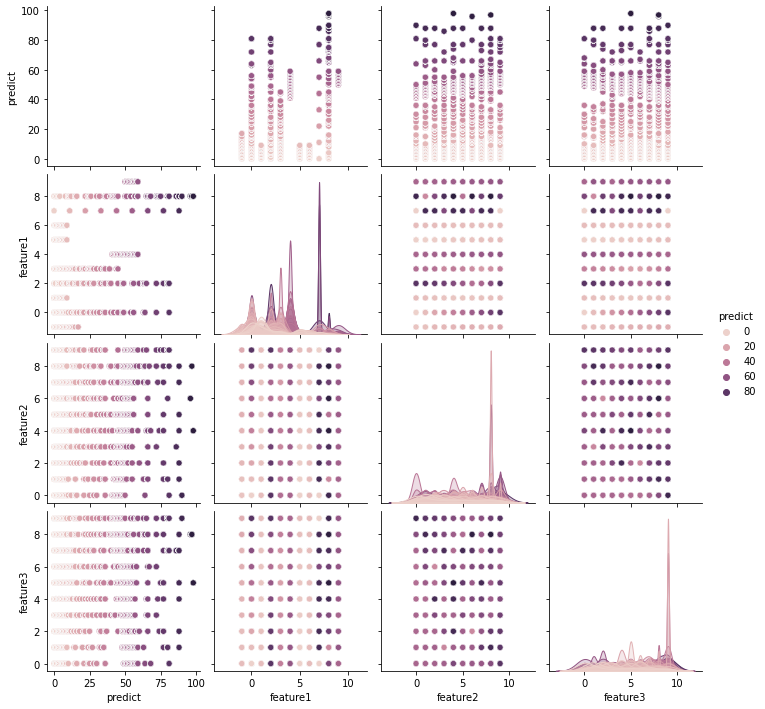

In [35]:
sns.pairplot(df_drop,hue='predict',vars=['predict','feature1','feature2','feature3'])

# Train

In [65]:
df_raw = df_drop[:]
df_raw = df_raw.sample(frac = 1) 

In [66]:
df_raw[['feature1',	'feature2'	,'feature3']]

,feature1,feature2,feature3
45375,8.0,0,9
36133,2.0,1,8
30909,4.0,6,3
34917,4.0,9,0
15070,3.0,0,6
...,...,...,...
41912,8.0,9,5
13567,2.0,8,9
47494,8.0,4,5
8590,6.0,8,0


In [67]:
from sklearn.model_selection import KFold
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
def trainmodel(dataset,num_folds,modfile=''):
  trainfeat, testfeat, trainlabel, testlabel = train_test_split(dataset[['feature1',	'feature2'	,'feature3']], dataset['predict'], test_size=0.2, random_state=42)
  #return trainfeat,testfeat,trainlabel,testlabel
  clf=RandomForestClassifier(n_estimators=100,random_state=1234)
  
  
  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=num_folds, shuffle=True)
  fold_no = 1
  for train, test in kfold.split(trainfeat, trainlabel):
    mod = clf.fit(np.array(trainfeat.values[train]),np.array(trainlabel.values[train]))
    res = mod.predict(np.array(trainfeat.values[test]))
    
    acc=0
    acc = sum(res == trainlabel.values[test])/len(res)
    print(f'fold{fold_no} acc:{acc}')
    fold_no = fold_no + 1

  res = mod.predict(np.array(testfeat.values))  
  acc = sum(res == testlabel.values)/len(res)
  print(f'acc with test data {acc}')
  if modfile!='':
      pickle.dump(mod,open(modfile,'wb'))
  conf = mod.predict_proba(np.array(testfeat.values))
  return mod,acc,conf,testlabel

In [69]:
mod,acc,conf,testlabel = trainmodel(df_raw,5,'class_model99.mod')

fold1 acc:0.9985596438392039
fold2 acc:0.9980358779625508
fold3 acc:0.9986905853083672
fold4 acc:0.9985596438392039
fold5 acc:0.999345206914615
acc with test data 0.9992667085690341
